In [5]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd
import geopandas as gpd
import geoplot as gplt

import geoplot.crs as gcrs

pd.set_option('max_columns', 6)

eqs_data = gpd.read_file('../data/raw_geojson.json')
map_data = gpd.read_file('../data/nepal_local.geojson')

country = []
for idx, row in eqs_data.iterrows():
    country.append(row['place'].split(',')[-1].strip())

eqs_data['place'] = country

nepal_data = eqs_data.query(f"place == 'Nepal'")



<GeoAxesSubplot:>

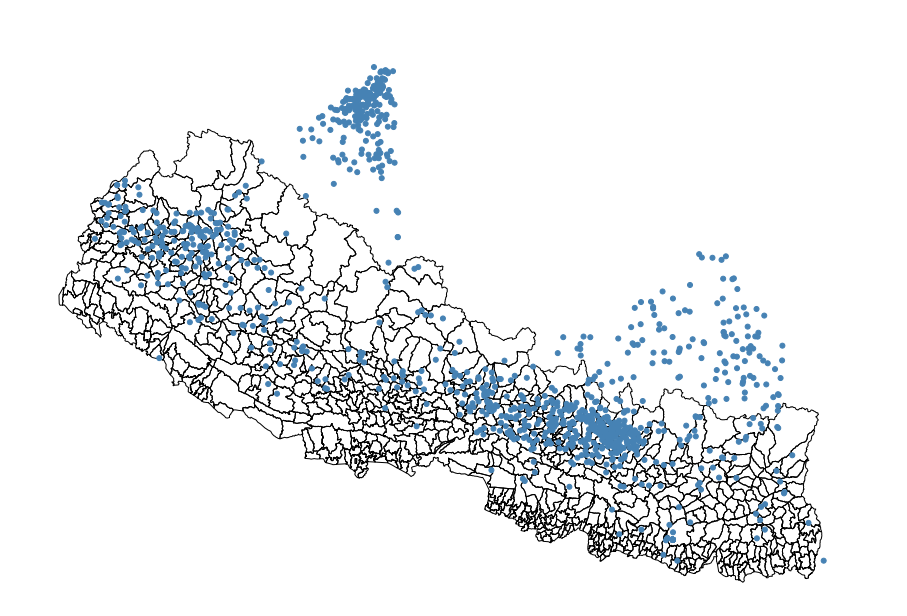

In [3]:
ax = gplt.polyplot(map_data, projection=gcrs.AlbersEqualArea(), figsize=(16,12))

ax.grid(True)

gplt.pointplot(nepal_data, ax=ax)